In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('customers1.csv')
print("The number of rows in the data set is",len(df))
print("The number of columns in the data set is",len(df.columns))
print("The columns in the data set is",df.columns)
df.head()

The number of rows in the data set is 8120
The number of columns in the data set is 15
The columns in the data set is Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Shop_Day',
       'Shop_Other', 'Shop_Dairy', 'Shop_Household', 'Shop_Meat', 'Group'],
      dtype='object')


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Shop_Day,Shop_Other,Shop_Dairy,Shop_Household,Shop_Meat,Group
0,462809,Male,No,22.0,No,Healthcare,1.0,Low,4.0,4.0,11.225,2.984,6.870,4.736,D
1,462643,Female,Yes,38.0,Yes,Engineer,NaN,Average,3.0,4.0,11.438,3.438,7.094,3.988,A
2,466315,Female,Yes,67.0,Yes,Engineer,NaN,Low,1.0,6.0,1.147,1.249,0.731,-0.673,B
3,461735,Male,Yes,67.0,Yes,Lawyer,0.0,High,2.0,6.0,5.701,2.689,-0.485,2.905,B
4,462669,Female,Yes,40.0,Yes,Entertainment,NaN,High,6.0,6.0,10.514,6.075,2.961,5.903,A


In [3]:
df_decision_tree = df[:]

In [4]:
df.drop(['ID'],inplace=True,axis = 1)

In [5]:
print("The data types of the various features are",df.dtypes)

The data types of the various features are Gender              object
Ever_Married        object
Age                float64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Shop_Day           float64
Shop_Other         float64
Shop_Dairy         float64
Shop_Household     float64
Shop_Meat          float64
Group               object
dtype: object


**Initial Data Analysis**

In [6]:
df.describe()

,Age,Work_Experience,Family_Size,Shop_Day,Shop_Other,Shop_Dairy,Shop_Household,Shop_Meat
count,8000.000000,7082.000000,7784.000000,8078.000000,7869.000000,7827.000000,8120.000000,8120.000000
mean,43.423500,2.627648,2.851233,5.086779,7.911617,4.766589,5.589339,5.103642
std,16.724207,3.385906,1.530861,1.503912,5.042374,4.267057,4.869441,3.808877
min,8.000000,0.000000,1.000000,0.000000,-6.055000,-9.070000,-9.581000,-8.670000
25%,30.000000,0.000000,2.000000,4.000000,4.404000,1.992500,2.309750,2.453750
50%,40.000000,1.000000,3.000000,6.000000,7.175000,4.341000,4.999000,4.642500
75%,53.000000,4.000000,4.000000,6.000000,11.179000,7.121500,8.646500,7.461750
max,89.000000,14.000000,9.000000,7.000000,28.181000,22.588000,24.215000,20.562000


In [7]:
#lets check for then number of null values in each feature

df.isna().sum()

Gender              220
Ever_Married        179
Age                 120
Graduated           325
Profession          124
Work_Experience    1038
Spending_Score        0
Family_Size         336
Shop_Day             42
Shop_Other          251
Shop_Dairy          293
Shop_Household        0
Shop_Meat             0
Group                 0
dtype: int64

In [8]:
df.dropna(subset = ['Gender','Ever_Married','Graduated','Profession'],inplace=True)

In [9]:
#lets replace the age with the nearest whole number of its mean
df['Age'].fillna(int(df['Age'].mean()),inplace=True)

In [10]:
#lets remove the days of the week where shop_day is 0 . this is because Shop_day has to be between 1 and 7

df = df[df['Shop_Day'] != 0]

In [11]:
#lets replace the work_experience with its median as well

df['Work_Experience'].fillna(df['Work_Experience'].median(),inplace = True)

In [12]:
#similarly for family size lets replace the null values iwth its median

df['Family_Size'].fillna(df['Family_Size'].median(),inplace = True)

In [13]:
df.dropna(subset = ['Shop_Day'],inplace=True)

In [14]:
df.dropna(subset=['Shop_Dairy','Shop_Other'],inplace=True)

In [15]:
dfCatego=df.copy()
dfCatego['Shop_Day'] = dfCatego['Shop_Day'].astype('category')

In [16]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Shop_Day           0
Shop_Other         0
Shop_Dairy         0
Shop_Household     0
Shop_Meat          0
Group              0
dtype: int64

In [17]:
dfCatego.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Shop_Day           0
Shop_Other         0
Shop_Dairy         0
Shop_Household     0
Shop_Meat          0
Group              0
dtype: int64

Explortaory data analysis

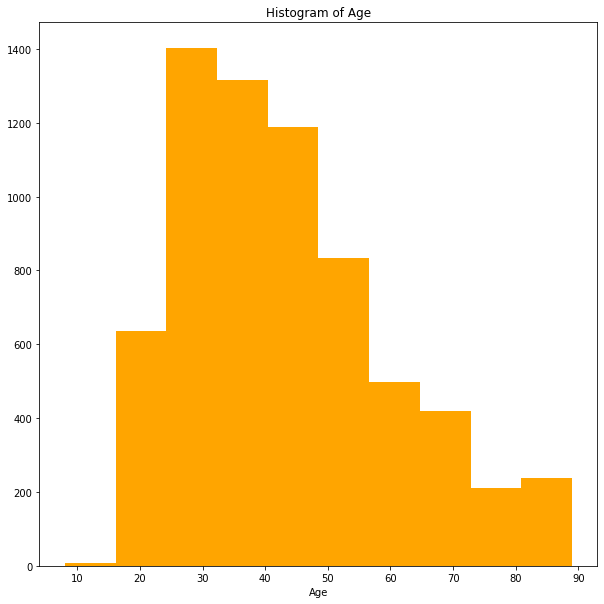

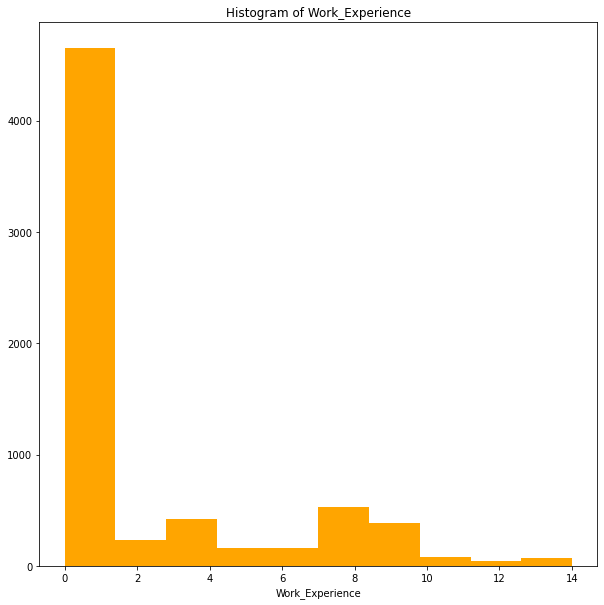

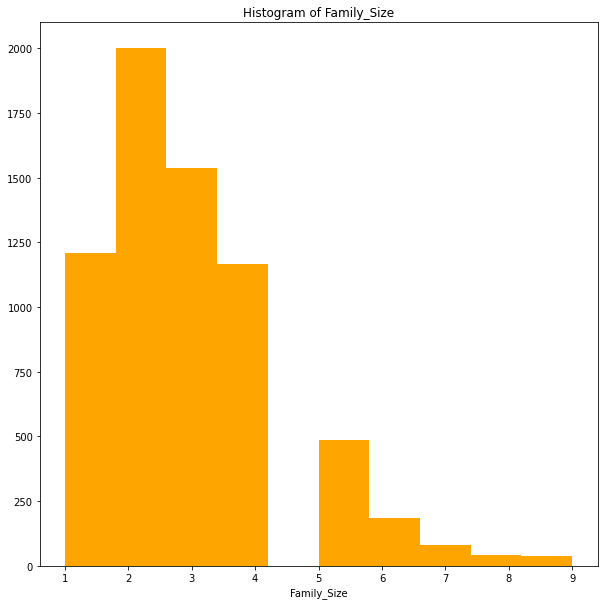

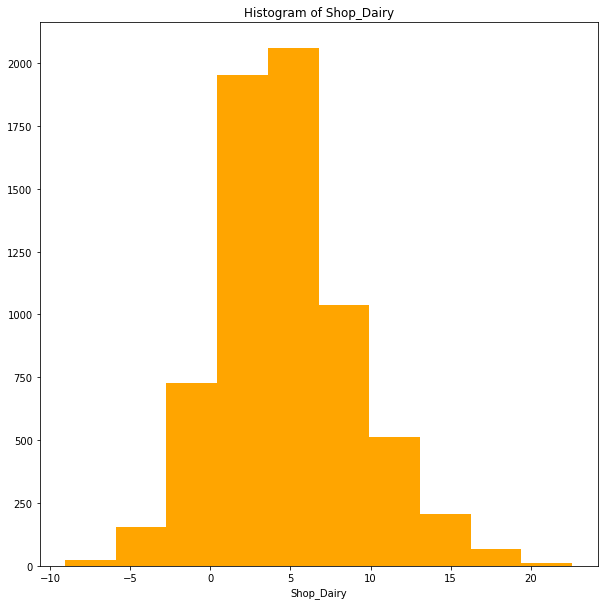

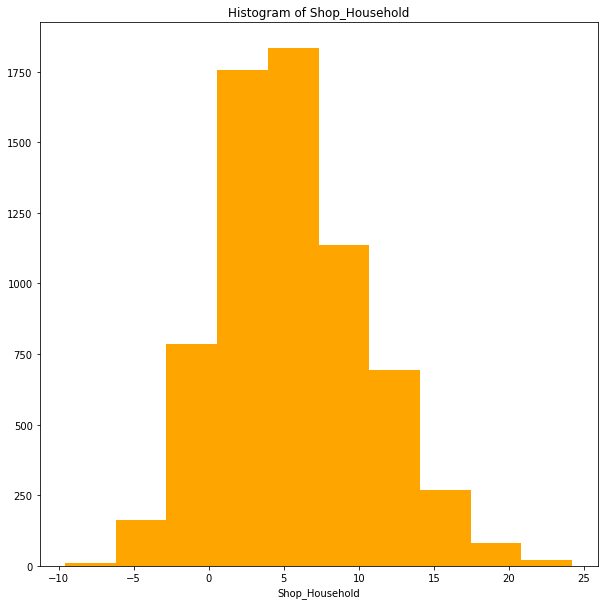

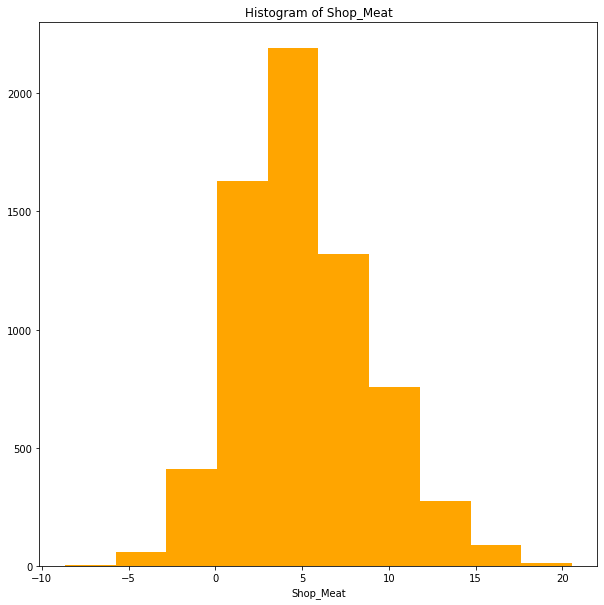

In [18]:
#Lets  find the distribution of age and other continuous varibles
columns = ['Age','Work_Experience','Family_Size','Shop_Dairy','Shop_Household','Shop_Meat']
for i in columns:
  plt.figure(figsize = (10,10))
  plt.hist(df[i],color = ["orange"])
  plt.xlabel(i)
  plt.title('Histogram of ' + str(i))

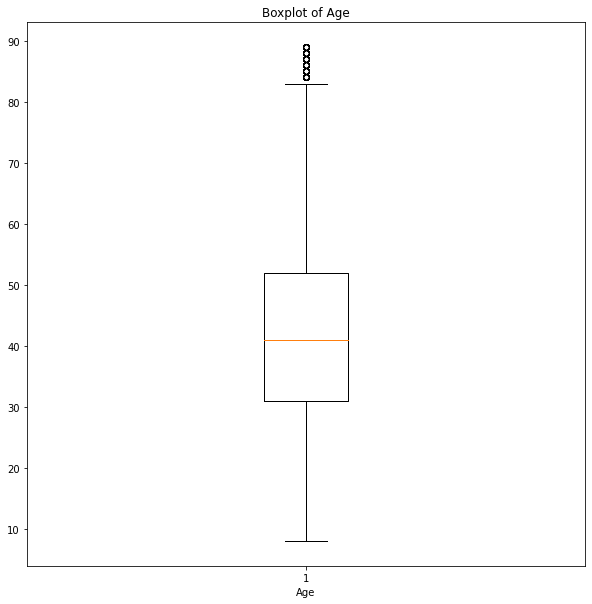

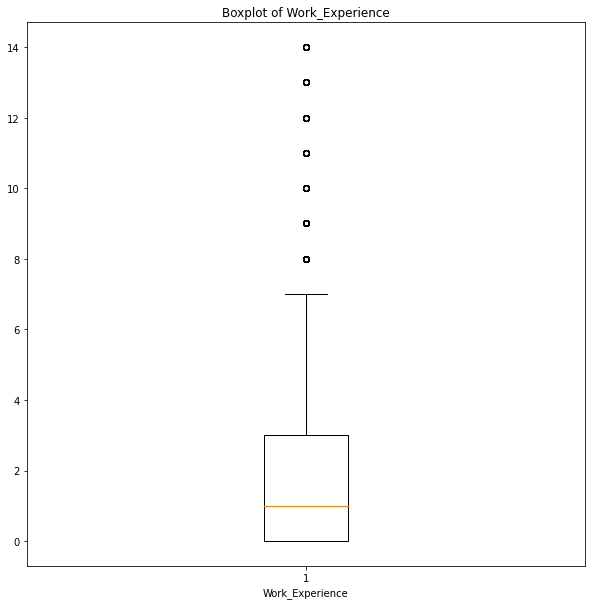

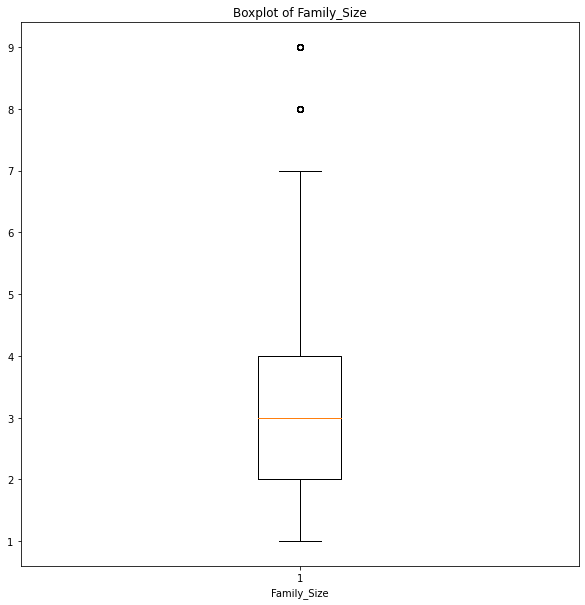

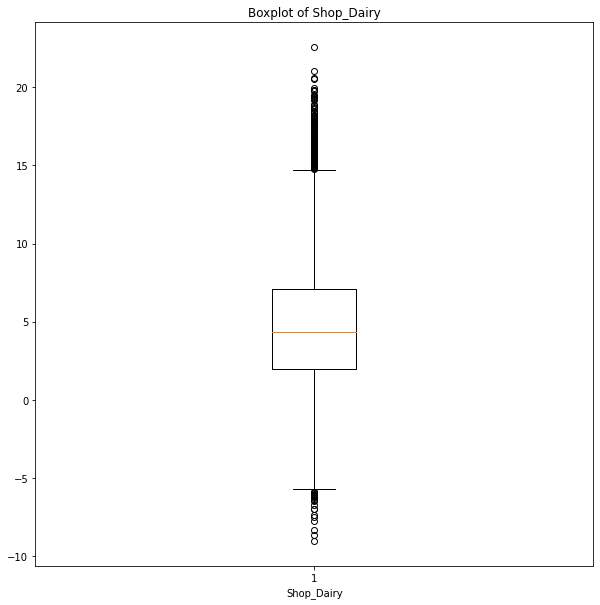

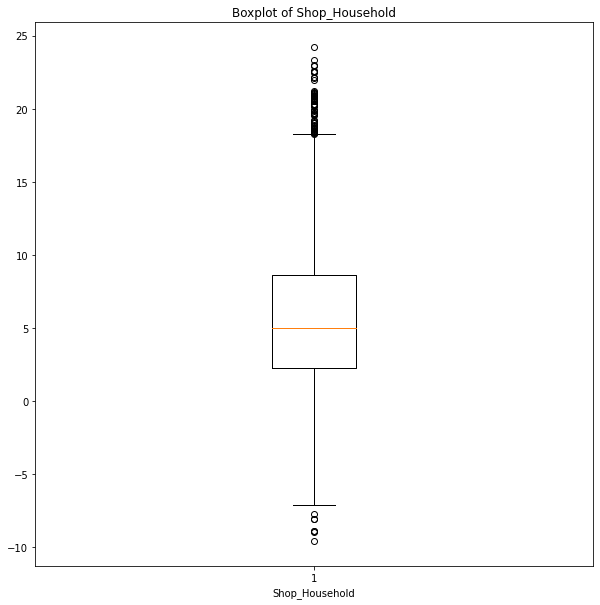

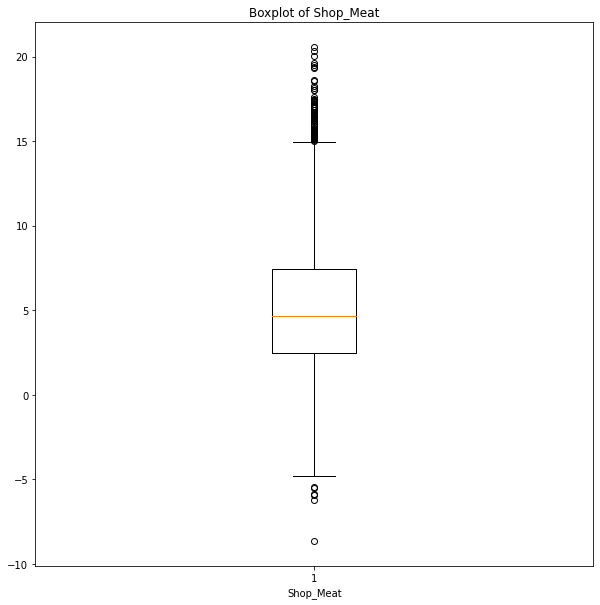

In [19]:
#lets use boxplots to check for any outliers

columns_outliers = ['Age','Work_Experience','Family_Size','Shop_Dairy','Shop_Household','Shop_Meat']
for i in columns_outliers:
  plt.figure(figsize = (10,10))
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.title('Boxplot of ' + str(i))

There a quite a few outliers in some of the features but we can ignore them and go ahead

Text(0.5, 1.0, 'Number of People of each group')

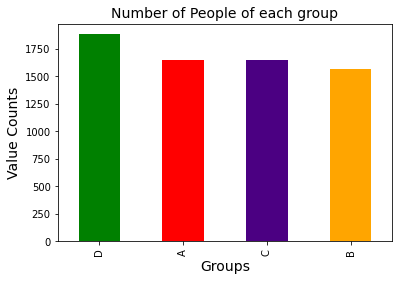

In [20]:
#Lets check for the value counts for the groups of people

df['Group'].value_counts().plot(kind = 'bar',color = ['green','red','indigo','orange'])
plt.xlabel('Groups',fontsize = 14)
plt.ylabel('Value Counts',fontsize = 14)
plt.title('Number of People of each group',fontsize = 14)

Text(0.5, 1.0, 'Count vs Gender')

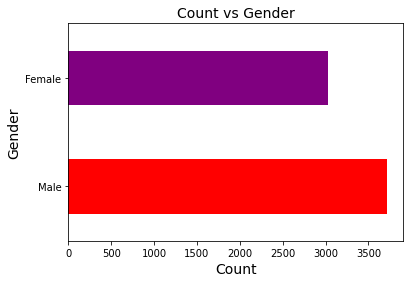

In [21]:
#lets check for the gender count

df['Gender'].value_counts().plot(kind = 'barh',color = ['red','purple'])
plt.xlabel('Count',fontsize = 14)
plt.ylabel('Gender',fontsize = 14)
plt.title('Count vs Gender',fontsize = 14)

Text(0.5, 1.0, 'Vlaue counts by profession')

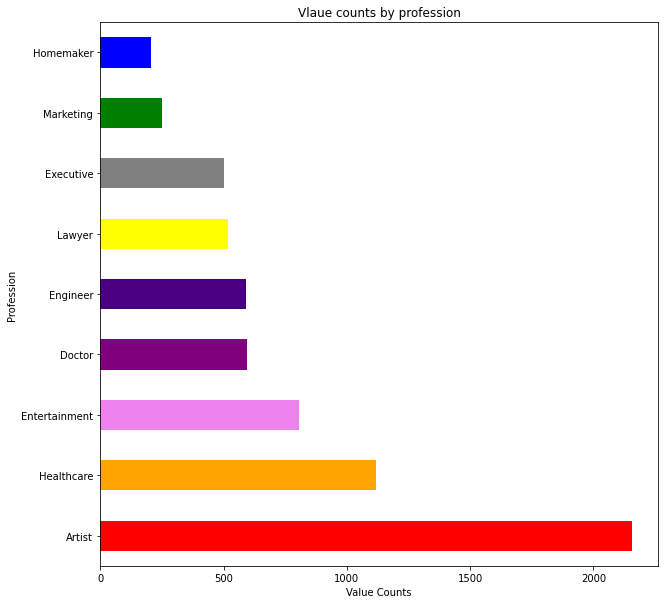

In [22]:
#lets check for the value count for professionals
plt.figure(figsize = (10,10))
df['Profession'].value_counts().plot(kind = 'barh',color = ['red','orange','violet','purple','indigo','yellow','grey','green','blue'])
plt.xlabel('Value Counts')
plt.ylabel('Profession')
plt.title('Vlaue counts by profession')

In [23]:
df_oh= pd.concat([dfCatego,pd.get_dummies(df['Profession'])],axis=1)
df_oh= pd.concat([df_oh,pd.get_dummies(df['Spending_Score'])],axis=1)
df_oh = pd.concat([df_oh,pd.get_dummies(df['Shop_Day'])],axis=1)

In [24]:
corr_oh = df_oh.corr()
corr_oh

,Age,Work_Experience,Family_Size,Shop_Other,Shop_Dairy,Shop_Household,Shop_Meat,Artist,Doctor,Engineer,...,Average,High,Low,1.0,2.0,3.0,4.0,5.0,6.0,7.0
Age,1.000000,-0.168368,-0.269546,-0.017578,0.065172,-0.034032,-0.033969,0.115387,-0.114042,-0.032670,...,0.116734,0.364177,-0.367079,-0.026347,-0.082496,-0.085827,-0.104390,-0.033132,0.199975,-0.051243
Work_Experience,-0.168368,1.000000,-0.070470,-0.006826,-0.006955,-0.012500,0.001678,0.019769,-0.008837,-0.001007,...,-0.025481,-0.055922,0.063000,-0.024483,0.020817,-0.013342,-0.045670,0.008715,0.034113,0.006182
Family_Size,-0.269546,-0.070470,1.000000,0.079487,0.047773,0.078299,0.068009,-0.150611,0.000751,0.029182,...,0.088757,0.044880,-0.110526,0.017844,0.075989,0.006309,0.176100,0.053260,-0.197291,0.042462
Shop_Other,-0.017578,-0.006826,0.079487,1.000000,0.392501,0.472839,0.246288,0.022180,0.003293,-0.066654,...,0.062044,-0.008721,-0.048130,0.010772,0.001044,-0.011821,-0.051129,0.006718,0.038767,0.001347
Shop_Dairy,0.065172,-0.006955,0.047773,0.392501,1.000000,0.341818,0.176810,0.113950,-0.002789,-0.062133,...,0.114479,0.028044,-0.120874,-0.002293,-0.010244,-0.042869,-0.053905,0.003766,0.070690,-0.000506
Shop_Household,-0.034032,-0.012500,0.078299,0.472839,0.341818,1.000000,0.245818,0.028732,-0.008896,-0.050375,...,0.053786,-0.018710,-0.033623,0.005530,-0.011889,-0.036511,-0.048472,-0.019021,0.068320,-0.006376
Shop_Meat,-0.033969,0.001678,0.068009,0.246288,0.176810,0.245818,1.000000,0.029842,-0.025345,-0.049724,...,0.054420,-0.003716,-0.045074,0.006231,-0.015142,-0.024394,-0.018312,0.013769,0.027973,0.009564
Artist,0.115387,0.019769,-0.150611,0.022180,0.113950,0.028732,0.029842,1.000000,-0.213161,-0.212572,...,0.243046,-0.102998,-0.138528,-0.012068,-0.015132,-0.044747,-0.106490,-0.005906,0.117818,-0.003587
Doctor,-0.114042,-0.008837,0.000751,0.003293,-0.002789,-0.008896,-0.025345,-0.213161,1.000000,-0.096596,...,0.007607,-0.090849,0.059331,0.001949,0.007841,0.021735,0.017410,-0.013067,-0.035032,0.022838
Engineer,-0.032670,-0.001007,0.029182,-0.066654,-0.062133,-0.050375,-0.049724,-0.212572,-0.096596,1.000000,...,0.053774,-0.060842,-0.003001,-0.009767,-0.028598,0.039765,0.144193,0.007040,-0.113530,-0.000801


<AxesSubplot:>

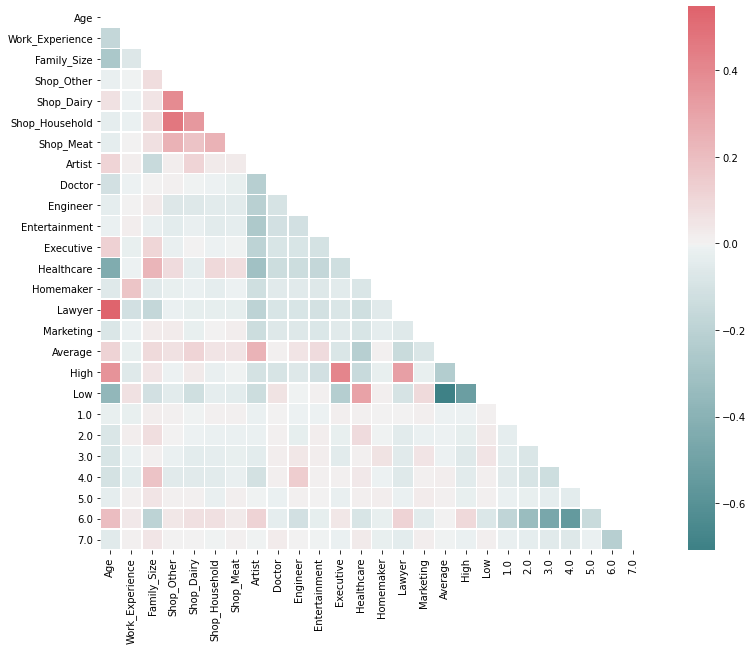

In [25]:
mask = np.triu(np.ones_like(corr_oh, dtype=bool))
f, ax = plt.subplots(figsize=(16, 10))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr_oh, mask=mask, cmap=cmap, center=0,
square=True, linewidths=.5)

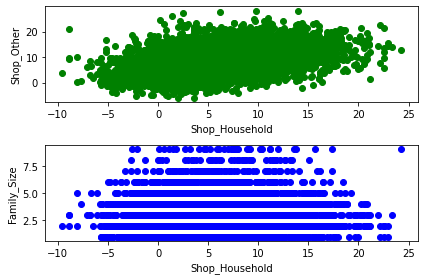

In [26]:
fig, a = plt.subplots(2)
x = df['Shop_Household']
y = df['Shop_Other']
a[0].plot(x, y, 'o', color='green')
a[0].set_ylabel('Shop_Other')
a[0].set_xlabel('Shop_Household')
a[1].plot(df['Shop_Household'],df['Family_Size'], 'o', color='blue')
a[1].set_ylabel('Family_Size')
a[1].set_xlabel('Shop_Household')

plt.tight_layout()

<AxesSubplot:ylabel='Frequency'>

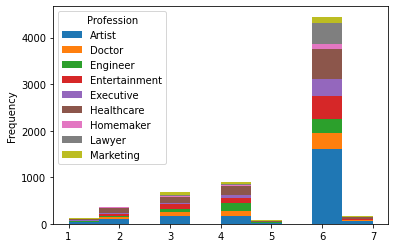

In [27]:
df.pivot(columns='Profession').Shop_Day.plot(kind = 'hist', stacked=True)

In [28]:
df.pivot_table(index=['Spending_Score', 'Shop_Day'],
aggfunc={'Shop_Other':'mean','Shop_Dairy':'mean','Shop_Household':'mean','Shop_Meat':'mean'})

Shop_Dairy  Shop_Household  Shop_Meat  Shop_Other
Spending_Score Shop_Day                                                   
Average        1.0         6.784846        7.196731   4.689269    8.373615
               2.0         5.192193        5.873892   5.899048    8.533590
               3.0         5.008431        5.471699   4.845954    8.014739
               4.0         3.933324        4.665000   5.031971    7.011752
               5.0         5.852300        5.304900   5.600300    8.514250
               6.0         5.998353        6.386235   5.639169    8.861358
               7.0         7.383811        6.980865   5.906757    8.307297
High           1.0         4.886133        5.625267   4.697533    6.469533
               2.0         4.896105        5.183211   4.629053    7.676368
               3.0         3.935304        4.057946   4.379911    7.254268
               4.0         3.825516        3.947710   4.409903    6.635473
               5.0         4.679400        4.799600   6.028200    6.627400
               6.0         5.309375        5.662779   5.215023    8.074597
               7.0         3.330947        3.635158   5.662895    6.296632
Low            1.0         3.923359        5.324192   5.600577    8.660051
               2.0         4.299492        5.167403   4.558871    7.781262
               3.0         3.960290        5.007329   4.876215    7.707882
               4.0         4.308786        5.258019   4.972594    7.472694
               5.0         4.531260        4.437140   5.568460    8.285420
               6.0         4.428903        5.616269   4.992218    7.723289
               7.0         4.052708        5.119991   5.089142    8.138443

Claasification model

In [29]:
from sklearn import preprocessing

def encoding_label(df,i):


    le = preprocessing.LabelEncoder()

    df[i] = le.fit_transform(df[i])

In [30]:
encoding_label(df,'Gender')
encoding_label(df,'Ever_Married')
encoding_label(df,'Graduated')
encoding_label(df,'Profession')
encoding_label(df,'Spending_Score')

In [31]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Shop_Day,Shop_Other,Shop_Dairy,Shop_Household,Shop_Meat,Group
0,1,0,22.0,0,5,1.0,2,4.0,4.0,11.225,2.984,6.870,4.736,D
1,0,1,38.0,1,2,1.0,0,3.0,4.0,11.438,3.438,7.094,3.988,A
2,0,1,67.0,1,2,1.0,2,1.0,6.0,1.147,1.249,0.731,-0.673,B
3,1,1,67.0,1,7,0.0,1,2.0,6.0,5.701,2.689,-0.485,2.905,B
4,0,1,40.0,1,3,1.0,1,6.0,6.0,10.514,6.075,2.961,5.903,A


Lets extract the 2 important fetaures using permuation importance for Naive Bayes

In [32]:
#using all features
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],random_state = 10)

clf = GaussianNB()

clf.fit(X_train,Y_train)

predicted_values = clf.predict(X_test)

print("The predicted values are",predicted_values)

print("The classification report is",classification_report(predicted_values,Y_test))



The predicted values are ['D' 'A' 'A' ... 'A' 'C' 'A']
The classification report is               precision    recall  f1-score   support

           A       0.81      0.77      0.79       434
           B       0.77      0.83      0.80       350
           C       0.83      0.85      0.84       395
           D       0.79      0.76      0.77       509

    accuracy                           0.80      1688
   macro avg       0.80      0.80      0.80      1688
weighted avg       0.80      0.80      0.80      1688



Using Permutation Importance

In [33]:
from sklearn.inspection import permutation_importance
important = permutation_importance(clf, X_test, Y_test)
temp =  important.importances_mean
b = temp[:]
print(b)

[0.00082938 0.00746445 0.0056872  0.01492891 0.02523697 0.00094787
 0.02582938 0.00379147 0.0007109  0.14016588 0.08590047 0.13815166
 0.06658768]


The two important features are shop other and shop household

In [34]:
df_tempo = pd.DataFrame(df,columns=['Shop_Other','Shop_Household','Group'])

X_train_tempo,X_test_tempo,Y_train_tempo,Y_test_tempo = train_test_split(df_tempo.iloc[:,:-1],df_tempo.iloc[:,-1],random_state = 10)

clf1 = GaussianNB()

clf1.fit(X_train_tempo,Y_train_tempo)

predicted_values_temp = clf1.predict(X_test_tempo)

print("The predicted values are",predicted_values_temp)

print("The classification report is",classification_report(predicted_values_temp,Y_test_tempo))

The predicted values are ['D' 'A' 'A' ... 'A' 'D' 'A']
The classification report is               precision    recall  f1-score   support

           A       0.76      0.60      0.67       523
           B       0.72      0.75      0.73       365
           C       0.65      0.74      0.69       359
           D       0.52      0.58      0.55       441

    accuracy                           0.66      1688
   macro avg       0.66      0.67      0.66      1688
weighted avg       0.67      0.66      0.66      1688



The accuracy decrease to 66 percent when we use only 2 features

In [35]:
import seaborn as sns
def bayes_plot(df,model="gnb",spread=30):
    df.dropna()
    colors = 'seismic'
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]
    sns.scatterplot(data=df, x=col1, y=col2,hue=target)
    plt.show()
    y = df[target]  # Target variable
    X = df.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)  # 70% training and 30% test

    clf = GaussianNB()
    clf = clf.fit(X_train, y_train)

    # Train Classifer


    prob = len(clf.classes_) == 4

    # Predict the response for test dataset

    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

    hueorder = clf.classes_
    def numify(val):
        return np.where(clf.classes_ == val)[0]

    Y = y.apply(numify)
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:

        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()

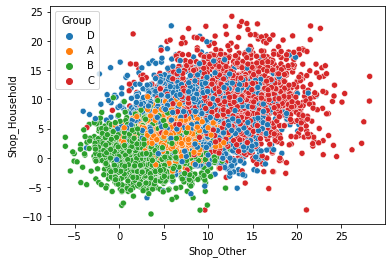

              precision    recall  f1-score   support

           A       0.62      0.76      0.68       503
           B       0.80      0.75      0.77       497
           C       0.72      0.71      0.71       458
           D       0.61      0.54      0.57       567

    accuracy                           0.68      2025
   macro avg       0.69      0.69      0.69      2025
weighted avg       0.69      0.68      0.68      2025



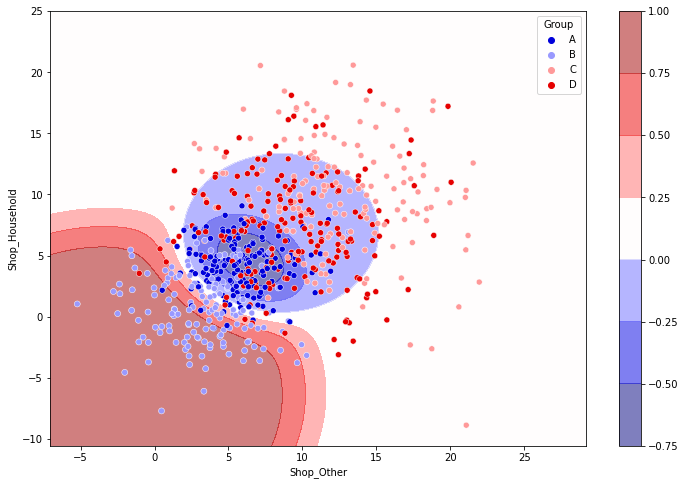

In [36]:
bayes_plot(pd.concat([df['Shop_Other'],df['Shop_Household'],df['Group']],axis = 1),spread = 10)

Decision Tree Baseline Model

In [37]:
df_decision_tree.dropna(inplace=True)

In [38]:
df_decision_tree.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Shop_Day,Shop_Other,Shop_Dairy,Shop_Household,Shop_Meat,Group
0,462809,Male,No,22.0,No,Healthcare,1.0,Low,4.0,4.0,11.225,2.984,6.870,4.736,D
3,461735,Male,Yes,67.0,Yes,Lawyer,0.0,High,2.0,6.0,5.701,2.689,-0.485,2.905,B
6,460156,Male,No,32.0,Yes,Healthcare,1.0,Low,3.0,6.0,19.346,11.167,11.939,5.583,C
8,465015,Female,Yes,61.0,Yes,Engineer,0.0,Low,3.0,7.0,17.857,-0.016,3.097,10.005,D
9,465176,Female,Yes,55.0,Yes,Artist,1.0,Average,4.0,6.0,4.837,10.199,12.105,4.741,C


In [39]:
encoding_label(df_decision_tree,'Gender')
encoding_label(df_decision_tree,'Ever_Married')
encoding_label(df_decision_tree,'Graduated')
encoding_label(df_decision_tree,'Profession')
encoding_label(df_decision_tree,'Spending_Score')

In [40]:
X_train_decison, X_test_decison, y_train_decision, y_test_decision = train_test_split(df_decision_tree.iloc[:,:-1], df_decision_tree.iloc[:,-1], test_size=0.3,random_state=1)


In [41]:
from sklearn.tree import DecisionTreeClassifier

clf_decison = DecisionTreeClassifier()

clf_decison.fit(X_train_decison,y_train_decision)

predicted_decision = clf_decison.predict(X_test_decison)

print("the predicted values are",predicted_decision)

print("The classification report is",classification_report(y_test_decision,predicted_decision))

the predicted values are ['C' 'B' 'A' ... 'A' 'B' 'C']
The classification report is               precision    recall  f1-score   support

           A       0.69      0.69      0.69       418
           B       0.78      0.72      0.75       399
           C       0.82      0.85      0.84       422
           D       0.72      0.73      0.72       459

    accuracy                           0.75      1698
   macro avg       0.75      0.75      0.75      1698
weighted avg       0.75      0.75      0.75      1698



In [42]:
len(df_decision_tree)

5657

In [43]:
X_train_decision_modified,X_test_decison_modified,Y_train_decision_modified,Y_test_decision_modified = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size = 0.3,random_state = 1)


In [44]:
len(df)

6749

In [45]:
clf_decison.fit(X_train_decision_modified,Y_train_decision_modified)

predicted_decision_modified = clf_decison.predict(X_test_decison_modified)

print("the predicted values are",predicted_decision_modified)

print("The classification report is",classification_report(Y_test_decision_modified,predicted_decision_modified))

the predicted values are ['D' 'A' 'C' ... 'C' 'B' 'B']
The classification report is               precision    recall  f1-score   support

           A       0.70      0.69      0.69       503
           B       0.75      0.72      0.74       497
           C       0.79      0.85      0.82       458
           D       0.74      0.73      0.73       567

    accuracy                           0.74      2025
   macro avg       0.74      0.75      0.75      2025
weighted avg       0.74      0.74      0.74      2025



Feature: 0, Score: 0.00256
Feature: 1, Score: 0.00271
Feature: 2, Score: 0.13740
Feature: 3, Score: 0.01361
Feature: 4, Score: 0.05563
Feature: 5, Score: 0.01811
Feature: 6, Score: 0.03752
Feature: 7, Score: 0.02093
Feature: 8, Score: 0.02246
Feature: 9, Score: 0.25422
Feature: 10, Score: 0.13538
Feature: 11, Score: 0.20691
Feature: 12, Score: 0.09256


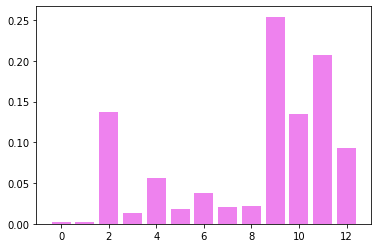

In [46]:
importance = clf_decison.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance,color = ['violet'])
plt.show()